In [109]:
from torch import tensor
from torch.utils.data import random_split
from torchvision.transforms import Compose, Resize, ToTensor, InterpolationMode
from torchvision.datasets import Flowers102
import cv2


class ToYCrCb(object):
    def __init__(self):
        pass

    def __call__(self, sample):
        print(f"sample before ycrcb = {sample.shape}")
        sample = sample.permute((1, 2, 0))
        sample = tensor(cv2.cvtColor(sample.numpy(), cv2.COLOR_BGR2YCR_CB))
        sample = sample.permute((2, 0, 1))
        print(f"sample after ycrcb = {sample.shape}")
        return sample


fds = Flowers102(
    "c:\\data\\flowers",
    # split="train",
    download=True,
    transform=Compose(
        [
            ToTensor(),
            ToYCrCb(),
            Resize((512, 512)),
        ]
    ),
)


sample before ycrcb = torch.Size([3, 500, 754])
sample after ycrcb = torch.Size([3, 500, 754])
torch.Size([3, 512, 512])


c:\dev\resnet18-vae\venv310\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


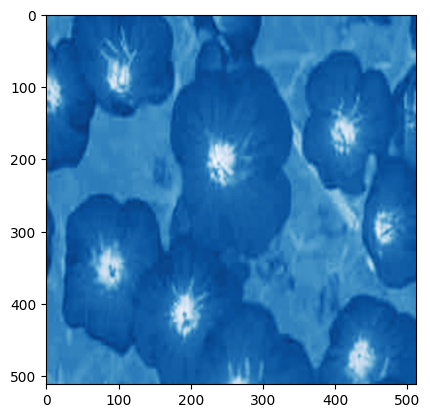

In [110]:
import matplotlib.pyplot as plt
test_img = fds[0][0]
print(test_img.shape)
plt.imshow(test_img[0,:,:], cmap='gray')
plt.imshow(test_img[1,:,:], cmap='Blues')

In [96]:
train, test = random_split(fds, (0.9, 0.1))
print(f"len(train) = {len(train)}")
print(f"train[0] tensor shape = {train[0][0].shape}")

len(train) = 918
sample before ycrcb = torch.Size([3, 667, 500])
sample after ycrcb = torch.Size([3, 667, 500])
train[0] tensor shape = torch.Size([3, 512, 512])


In [ ]:
import pandas as pd

train_df = pd.DataFrame(
    {
        "channels": map(lambda x: x[0].shape[0], train),
        "width": map(lambda x: x[0].shape[1], train),
        "height": map(lambda x: x[0].shape[2], train),
        "class": map(lambda x: x[1], train),
    }
)
train_df

In [ ]:
from torch.utils.data.dataloader import DataLoader

dl = DataLoader(train, batch_size=32, shuffle=True)

for x, y in dl:
    print(x, y)

In [ ]:
import matplotlib.pyplot as plt

c:\dev\resnet18-vae\venv310\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


error: OpenCV(4.7.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x820c46fd::Set<3,-1,-1>,struct cv::impl::A0x820c46fd::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 512
